Consider the Lorenz system:
$$
\begin{cases}
x = \sigma\, (y-x) \\
y = x\,(\rho-z) - y \\
z = xy - \beta\, z
\end{cases}
$$
Here we consider the special case:
$$
\begin{cases}
\sigma = 10\\
\beta = \frac{8}{3}\\
\rho = 28
\end{cases}
$$
with initial condition
$$
\begin{bmatrix}
x\\
y\\
z\\
\end{bmatrix} = 
\begin{bmatrix}
1\\
-1\\
30
\end{bmatrix}
$$

In [10]:
import numpy as np

# Lorenz system
def func(x, y, z):
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

# Sigma, beta, rho paramaters
sigma = 10 #10
beta = 8/3 #8/3
rho = 25 #28

T = 100  # total time
h = pow(10, -3)  # step size
N = int(T/h)  # number of iterations

x = np.zeros(N+1)
y = np.zeros(N+1)
z = np.zeros(N+1)

# Initial condition
x[0] = 1 #1
y[0] = -1  #-1
z[0] = 30 #30

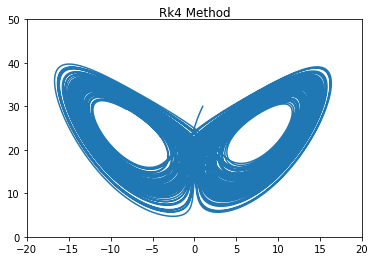

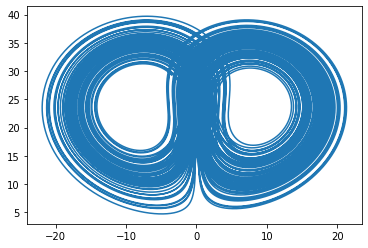

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros(N+1)
y = np.zeros(N+1)
z = np.zeros(N+1)

# Initial condition
x[0] = 1 #1
y[0] = -1  #-1
z[0] = 30 #30

def func(x, y, z):
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

# RK4 method
for n in range(0, N):
    k1 = func(x[n], y[n], z[n])
    k2 = func(x[n] + h/2*k1[0], y[n] + h/2*k1[1], z[n] + h/2*k1[2])
    k3 = func(x[n] + h/2*k2[0], y[n] + h/2*k2[1], z[n] + h/2*k2[2])
    k4 = func(x[n] + h*k3[0], y[n] + h*k3[1], z[n] + h*k3[2])
    x[n+1] = x[n] + h/6 * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    y[n+1] = y[n] + h/6 * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    z[n+1] = z[n] + h/6 * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2])

ax = plt.subplot()
plt.title('Rk4 Method', pad=2)
ax.plot(x, z)
ax.set_xlim(-20, 20)
ax.set_ylim(0, 50)
plt.show()

ax = plt.subplot()
ax.plot(y, z)

plt.show()

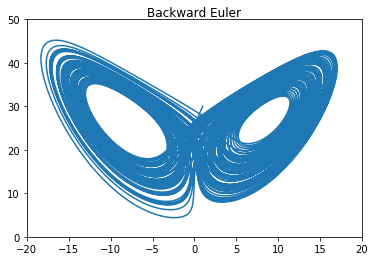

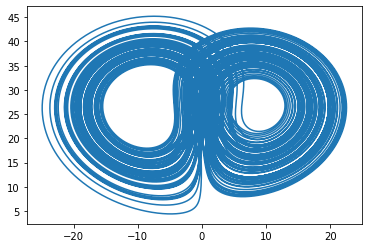

In [21]:
import linear_system.exact_sol as solve
from linear_system.least_square_sol import l2_norm
import numpy as np
import matplotlib.pyplot as plt

# Backward Euler's method

x = np.zeros(N + 1)
y = np.zeros(N + 1)
z = np.zeros(N + 1)

# Initial condition
x[0] = 1  # 1
y[0] = -1  # -1
z[0] = 30  # 30

# Tolerance of error in root finding
tol = pow(10, -5)


def jacobian_F(x1):
    return [[- h * sigma - 1, h * sigma, 0],
            [h * (rho - x1[2]), - h - 1, - h * x1[0]],
            [h * x1[1], h * x1[0], - h * beta - 1]]


def F(x0, x1):
    return [x0[0] + h * sigma * (x1[1] - x1[0]) - x1[0],
            x0[1] + h * (x1[0] * (rho - x1[2]) - x1[1]) - x1[1],
            x0[2] + h * (x1[0] * x1[1] - beta * x1[2]) - x1[2]]


def next_x(v):
    v0 = v  # Initially, assume x(n+1)_0 = x(n)
    while l2_norm(F(v, v0)) >= tol:
        v1 = v0 + solve.gaussian_eli_partial_pivot_vec(jacobian_F(v), -np.array(F(v, v0)))
        v0 = v1
    return v0


for n in range(N):
    v = [x[n], y[n], z[n]]
    r = next_x(v)
    x[n + 1], y[n + 1], z[n + 1] = r[0], r[1], r[2]

fig1 = plt.figure()
ax = plt.subplot()
plt.title('Backward Euler', pad=2)
ax.plot(x, z)
ax.set_xlim(-20, 20)
ax.set_ylim(0, 50)

fig2 = plt.figure()
ax = plt.subplot()
ax.plot(y, z)

plt.show()